In [64]:
#Importing necessary tools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [65]:
df = pd.DataFrame(pd.read_csv("creditcard.csv/creditcard.csv"))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [67]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploratory data analysis (EDA)

In [68]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [69]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


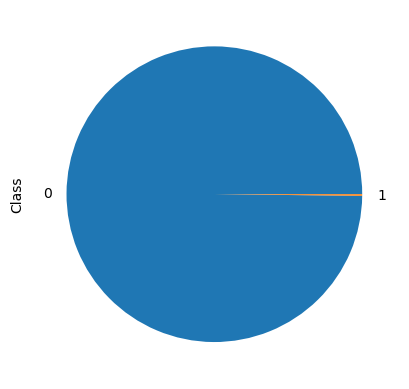

In [70]:
print((df.groupby('Class')['Class'].count()/df["Class"].count())*100)
((df.groupby('Class')['Class'].count()/df["Class"].count())*100).plot.pie();

In [71]:
temp = df["Class"].value_counts()
df_tmp = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df_tmp['Class'],y = df_tmp['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df_tmp['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=700
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

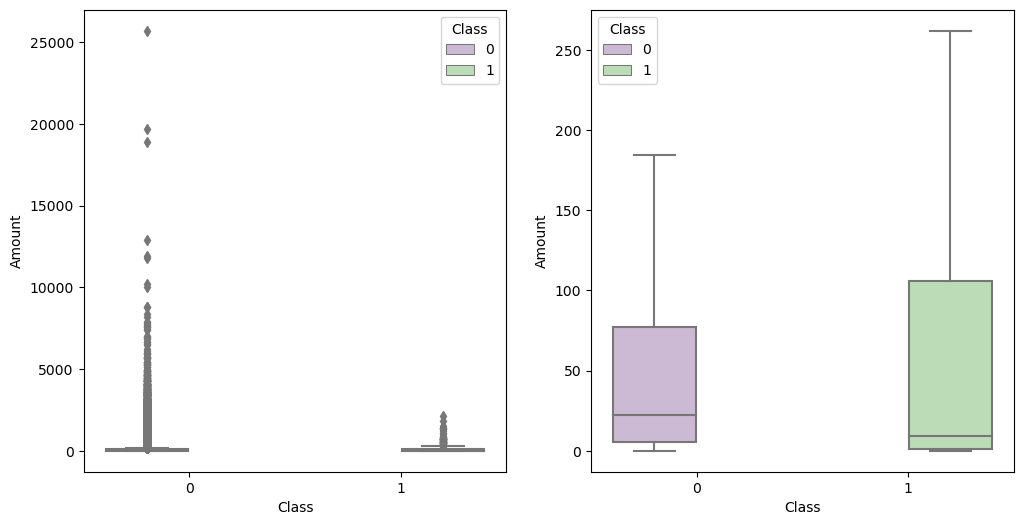

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

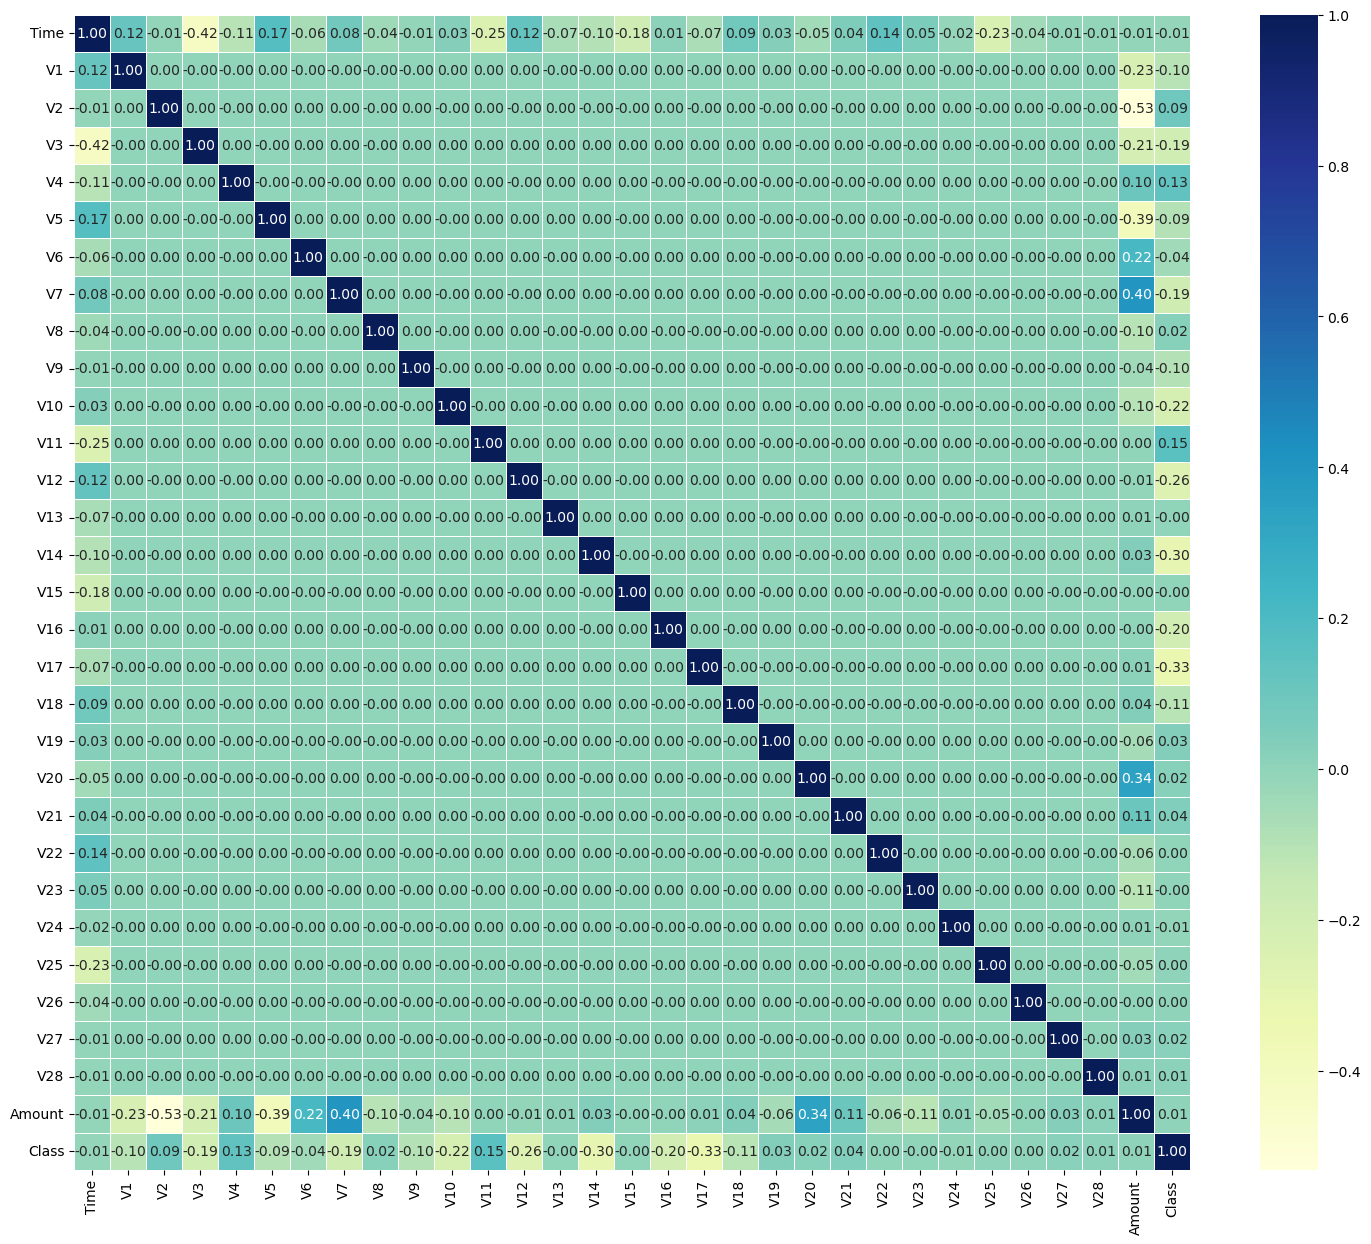

In [73]:
#Getting the correlation matrix of features
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (18,15))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu")

In [74]:
#Splitting the features and the targwt variables
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
np.random.seed(42)

log_class = LogisticRegression()
lg_grid = {'C': 10.0 ** np.arange(-2,3), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
cv = KFold(n_splits = 5)

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
np.random.seed(42)

clf = GridSearchCV(log_class, lg_grid, cv = cv, n_jobs = -1, scoring = 'f1_macro')
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='f1_macro')

In [77]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
print(accuracy_score(y_test,y_preds))

0.9991222218320986


In [79]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [80]:
print(confusion_matrix(y_test,y_preds))

[[56855     9]
 [   41    57]]


## Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
Rclf = RandomForestClassifier(criterion = "gini", max_depth = 10, min_samples_split = 5, min_samples_leaf = 1)
Rclf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [82]:
y_preds = Rclf.predict(X_test)
y_preds

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
print(accuracy_score(y_test,y_preds))

0.9995259997893332


In [84]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [85]:
print(confusion_matrix(y_test,y_preds))

[[56862     2]
 [   25    73]]


## Performing UnderSampling: NearMiss

In [86]:
from collections import Counter
Counter(y_train)

Counter({0: 227451, 1: 394})

In [87]:
from imblearn.under_sampling import NearMiss
ns = NearMiss(version=1, n_neighbors = 3)
X_train_ns, y_train_ns = ns.fit_resample(X_train, y_train)
print(f"The number of classes before fitting: {Counter(y_train)}")
print(f"The number of classes after fitting: {Counter(y_train_ns)}")

The number of classes before fitting: Counter({0: 227451, 1: 394})
The number of classes after fitting: Counter({0: 394, 1: 394})


In [88]:
Rclf = RandomForestClassifier()
Rclf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [89]:
y_preds = Rclf.predict(X_test)
y_preds

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [90]:
print(confusion_matrix(y_test,y_preds))

[[35633 21231]
 [    5    93]]


In [91]:
print(accuracy_score(y_test,y_preds))

0.627190056528914


In [92]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77     56864
           1       0.00      0.95      0.01        98

    accuracy                           0.63     56962
   macro avg       0.50      0.79      0.39     56962
weighted avg       1.00      0.63      0.77     56962



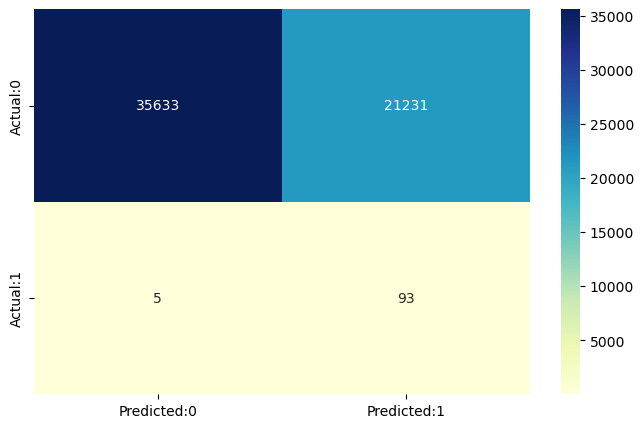

In [93]:
cm = confusion_matrix(y_test, y_preds)
matrix = pd.DataFrame(data=cm, index = ['Actual:0' , 'Actual:1'], columns = ['Predicted:0', 'Predicted:1'])
plt.figure(figsize = (8,5))
sns.heatmap(matrix,
            annot = True,
            fmt = 'd',
           cmap = 'YlGnBu');

In [94]:
catboost_ready_df = df.dropna()

features = [feat for feat in list(catboost_ready_df) if feat!='Class']
print(features)
card_categories = np.where(catboost_ready_df[features].dtypes != np.float64)[0]
card_categories

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


array([], dtype=int64)

In [95]:
from catboost import CatBoostClassifier

params = {
    'iterations': 5000,
    'learning_rate': 0.01,
    'cat_features': card_categories,
    'depth': 3,
    'eval_metric': 'AUC',
    'verbose': 200,
    'od_type': "Iter", #detects overfit
    'od_wait': 500,
    'random_seed': 42
}

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,
             eval_set = (X_test, y_test),
             use_best_model=True,
             plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.9094351	best: 0.9094351 (0)	total: 30ms	remaining: 2m 29s
200:	test: 0.9760802	best: 0.9763354 (173)	total: 4.05s	remaining: 1m 36s
400:	test: 0.9764849	best: 0.9768291 (386)	total: 7.71s	remaining: 1m 28s
600:	test: 0.9773416	best: 0.9773782 (595)	total: 11.4s	remaining: 1m 23s
800:	test: 0.9791517	best: 0.9791655 (791)	total: 15.2s	remaining: 1m 19s
1000:	test: 0.9795856	best: 0.9795960 (994)	total: 19.1s	remaining: 1m 16s
1200:	test: 0.9806068	best: 0.9806375 (1195)	total: 23.9s	remaining: 1m 15s
1400:	test: 0.9805018	best: 0.9807554 (1250)	total: 29.2s	remaining: 1m 15s
1600:	test: 0.9801280	best: 0.9807554 (1250)	total: 34.8s	remaining: 1m 13s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.9807553719
bestIteration = 1250

Shrink model to first 1251 iterations.


In [96]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
              'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [97]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42,
                        algorithm = 'SAMME.R',
                        learning_rate = 0.8,
                        n_estimators = 100)

In [98]:
clf.fit(df[predictors], df['Class'].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [99]:
y_preds = clf.predict(df[predictors])

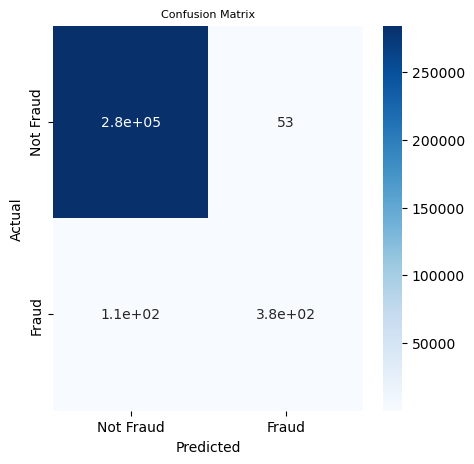

In [100]:
matrix = pd.crosstab(df[target].values, y_preds, rownames = ['Actual'], colnames = ['Predicted'])
fig , ax = plt.subplots(ncols=1, figsize = (5,5))
sns.heatmap(matrix,
            xticklabels = ['Not Fraud','Fraud'],
            yticklabels = ['Not Fraud','Fraud'],
            annot = True,
            ax = ax,
            linecolor = 'Darkblue', cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 8)
plt.show();

### Hence we can see that the model using Undersampling is not performing good in the fraudulent transactions


## SMOTE Technique (Over-Sampling)

In [101]:
from imblearn.combine import SMOTETomek

In [102]:
os = SMOTETomek(random_state=42)
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)
print(f"The number of classes before fitting: {Counter(y_train)}")
print(f"The number of classes after fitting: {Counter(y_train_ns)}")

The number of classes before fitting: Counter({0: 227451, 1: 394})
The number of classes after fitting: Counter({0: 226808, 1: 226808})


In [27]:
Rclf = RandomForestClassifier()
Rclf.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [28]:
y_preds = Rclf.predict(X_test)

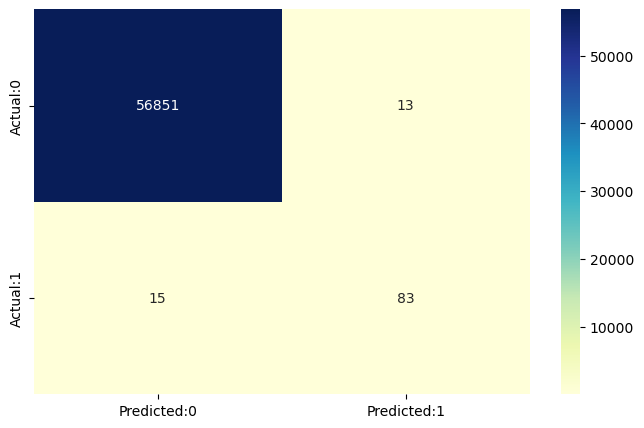

In [30]:
cm = confusion_matrix(y_test, y_preds)
matrix = pd.DataFrame(data=cm, index = ['Actual:0' , 'Actual:1'], columns = ['Predicted:0', 'Predicted:1'])
plt.figure(figsize = (8,5))
sns.heatmap(matrix,
            annot = True,
            fmt = 'd',
           cmap = 'YlGnBu');

In [31]:
print(accuracy_score(y_test,y_preds))

0.9995084442259752


In [32]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



### Oversampling(SMOTE) technique gives a great result(High values for precision, recall and f1 scores)

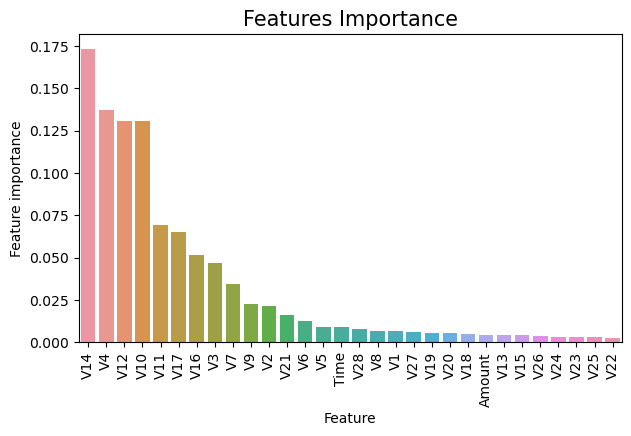

In [63]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': Rclf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features Importance',fontsize=15)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   